# **project 5 - part B**

Guy Hadad 316508126

Noam Shamir 316299098

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import math
import datetime 
from datetime import datetime, date
import seaborn as sns
from tabulate import tabulate
import random
from scipy.stats import bernoulli
import copy


In [139]:
df = pd.read_csv('framingham_heart_disease.csv')

נבחר את המשתנים המסבירים:


גיל (רציף)

מין (בדיד)

כולסטרול (רציף)

והמשתנה המוסבר: לחץ דם (סיסטולי)




In [140]:
#Q1
#sample 1000 rows 
n = 1000
df1000 = df.sample(n, random_state=0).reset_index(inplace=False).drop(['index'], axis= 1)
df1000.dropna(how='any', subset=['male','totChol', 'age', 'sysBP'], inplace=True)
n = len(df1000)
n

993

In [141]:
#Q2
#liner regression for sysBP

x_temp = df1000[['male','totChol', 'age']].to_numpy()
x = np.c_[np.ones(n), x_temp]
y = df1000['sysBP'].to_numpy()

b_hat = np.linalg.inv(x.T@x)@(x.T)@y

print("Coefficients are: ['intercept', 'male','totChol', 'age']")
print ("Estimated beta: ", np.round(b_hat, decimals=2))

#calculate CI
df1000["y_hat"] = x@b_hat
sse = sum(e_i**2 for e_i in (df1000['sysBP']-df1000["y_hat"]))
cis_q2 = []
for i in range(len(b_hat)):
    diff = stats.norm.ppf(0.975)*np.sqrt((sse/(n-4))*np.linalg.inv(x.T@x)[i][i])
    ci = [round(b_hat[i] - diff, 2), round(b_hat[i] + diff, 2)]
    cis_q2.append(ci)
    print("CI for beta_" + str(i)+ " is: ", ci)

Coefficients are: ['intercept', 'male','totChol', 'age']
Estimated beta:  [ 7.111e+01 -3.400e-01  6.000e-02  9.800e-01]
CI for beta_0 is:  [61.91, 80.3]
CI for beta_1 is:  [-2.92, 2.25]
CI for beta_2 is:  [0.03, 0.08]
CI for beta_3 is:  [0.83, 1.14]


In [142]:
#Q3
#produce missing data
np.random.seed(0)

df_sort = df1000.sort_values('sysBP').reset_index(inplace=False)
random_values = np.random.uniform(0,1,n)
indices_to_remove = []

for i in range(n):
  if random_values[i] < (i/(i+430)): #this value retrieve exactly 500 rows
    indices_to_remove.append(df_sort['index'][i])

remain = set(df_sort['index']).difference(set(indices_to_remove))
half_df = df_sort.loc[df_sort['index'].isin(remain)].reset_index(inplace=False).drop(['level_0'], axis=1)

In [143]:
#Q4.a
#Estimate coefficients only by data which is full
n_half = len(half_df)
x_temp = half_df[['male','totChol', 'age']].to_numpy()
x_half = np.c_[np.ones(n_half), x_temp]
y_half = half_df['sysBP'].to_numpy()

b_hat_half = np.linalg.inv(x_half.T@x_half)@(x_half.T)@y_half

print("Coefficients are: ['intercept', 'male','totChol', 'age']")
print ("Estimated beta: ", np.round(b_hat_half, decimals=2))

half_df["y_hat"] = x_half.dot(b_hat_half)
sse_half = sum(e_i**2 for e_i in (half_df['sysBP']-half_df["y_hat"]))
cis_4a = []
for i in range(len(b_hat_half)):
    diff = stats.norm.ppf(0.975)*np.sqrt((sse_half/(n-4))*np.linalg.inv(x_half.T@x_half)[i][i])
    ci = [round(b_hat_half[i] - diff, 2), round(b_hat_half[i] + diff, 2)]
    cis_4a.append(ci)
    print("CI for beta_" + str(i)+ " is: ", ci)

Coefficients are: ['intercept', 'male','totChol', 'age']
Estimated beta:  [ 6.494e+01 -5.100e-01  5.000e-02  1.040e+00]
CI for beta_0 is:  [56.24, 73.63]
CI for beta_1 is:  [-2.93, 1.91]
CI for beta_2 is:  [0.02, 0.08]
CI for beta_3 is:  [0.89, 1.18]


In [144]:
#Q4.b
# regression imputation

x_temp = df_sort[['male','totChol', 'age']].to_numpy()
x_2 = np.c_[np.ones(n), x_temp]
y_2 = copy.deepcopy(df_sort['sysBP'].to_numpy())

for i in range(len(y_2)):
    if df_sort['index'][i] in indices_to_remove:
        y_2[i] = x_2[i]@b_hat_half

b_hat_half_2 = np.linalg.inv(x_2.T@x_2)@x_2.T@y_2

print("Coefficients are: ['intercept', 'male','totChol', 'age']")
print ("Estimated beta: ", np.round(b_hat_half_2, decimals=2))

y_hat_2 = x_2.dot(b_hat_half_2)
sse_2 = sum(i**2 for i in (y_2-y_hat_2))
cis_4b = []
for i in range(len(b_hat_half_2)):
    diff = stats.norm.ppf(0.975)*np.sqrt((sse_2/(n-4))*np.linalg.inv(x_2.T@x_2)[i][i])
    ci = [round(b_hat_half_2[i] - diff, 2), round(b_hat_half_2[i] + diff, 2)]
    cis_4b.append(ci)
    print("CI for beta_" + str(i)+ " is: ", ci)

Coefficients are: ['intercept', 'male','totChol', 'age']
Estimated beta:  [ 6.494e+01 -5.100e-01  5.000e-02  1.040e+00]
CI for beta_0 is:  [58.83, 71.04]
CI for beta_1 is:  [-2.23, 1.2]
CI for beta_2 is:  [0.03, 0.07]
CI for beta_3 is:  [0.93, 1.14]


קיבלנו את אותם המקדמים שהיו בסעיף הקודם.

תוצאה זו לא מפתיעה כיוון שהנתונים שהוספנו כעת נמצאים על ישר הרגרסיה (שהרי נלמדו מהמודל) ולכן לא ישנו את המקדמים. להפך - הם מחזקים אותם.
נשים לב שרווחי הסמם הצטמצמו כי השונות קטנה - כיוון שיש יותר נתונים שיושבים על ישר הרגרסיה והפיזור כעת קטן.


In [145]:
#Q4.c
#multiple imputation

M = n
betas = []
b_vars = []
for j in range(M):
    x_temp = df_sort[['male','totChol', 'age']].to_numpy()
    x_3 = np.c_[np.ones(n), x_temp]
    y_3 = df_sort['sysBP'].to_numpy()

    for i in range(len(y_3)):
        if df_sort['index'][i] in indices_to_remove:
            y_3[i] = np.random.normal(x_3[i]@b_hat_half, sse_half/(n-4))
    
    b = np.linalg.inv(x_3.T@x_3)@x_3.T@y_3
    betas.append(b)
        
    #CI
    p = len(b)
    var_hat = np.zeros(p)
    y_hat_3 = x_3@b
    sse_3 = sum(e_i**2 for e_i in (y_3-y_hat_3))
    e_sq_hat = sse_3 / (n - p)
    c = np.linalg.inv((x_3.T.dot(x_3)))
    for i in range(p):
        var_hat[i] = e_sq_hat*c[i][i]
    b_vars.append(var_hat)

In [146]:
beta = np.zeros(4)
for b in betas:
    for i in range(4):
        beta[i] += b[i]
beta = beta / M

print("Coefficients are: ['intercept', 'male','totChol', 'age']")
print("Estimated beta: ", np.round(beta, decimals=2))


Coefficients are: ['intercept', 'male','totChol', 'age']
Estimated beta:  [ 6.288e+01 -8.000e-01  6.000e-02  1.040e+00]


In [147]:
#Q4.d
#Rubin
p=4
var_hat = np.zeros(p)
sum_var = np.zeros(p)
d = np.zeros(p)
for j in range(M):
    for i in range(p):
        sum_var[i] += b_vars[j][i]
        d[i] += (betas[j][i] - beta[i])**2
for i in range(p):
    var_hat[i] = sum_var[i] / M + ((M + 1) / (M * (M - 1))) * d[i]
cis_d = []
# calculate ci for each beta entry
for i in range(p):
    diff2 = stats.norm.ppf(0.975)*(var_hat[i]**0.5)
    cis_d.append((round(beta[i] - diff2, 3), round(beta[i] + diff2, 3)))
    print("CI for beta_" + str(i)+ " is: ", cis_d[i])

CI for beta_0 is:  (-20.226, 145.981)
CI for beta_1 is:  (-24.156, 22.56)
CI for beta_2 is:  (-0.208, 0.327)
CI for beta_3 is:  (-0.358, 2.429)


In [148]:
#Q4.e
#Logistic regression with R
from sklearn.linear_model import LogisticRegression
R = []

for i in range(len(df_sort)):
    if df_sort['index'][i] in indices_to_remove:
        R.append(0)
    else:
        R.append(1)
x_temp = df_sort[['male','totChol', 'age']].to_numpy()
x_4 = np.c_[np.ones(n), x_temp]

logreg = LogisticRegression(penalty='none', fit_intercept=False, multi_class='ovr')
logreg.fit(x_4, R)
beta = logreg.coef_[0]

print("Coefficients are: ['intercept', 'male','totChol', 'age']")
print("Estimated beta: ", np.round(beta, decimals=3))

Coefficients are: ['intercept', 'male','totChol', 'age']
Estimated beta:  [ 1.625  0.073 -0.002 -0.023]


In [149]:
#Q4.f
#IPW

def pi(n):
  return math.exp(n)/(1 + math.exp(n))

In [150]:
n = len(half_df)

x_5 = half_df[['male','totChol', 'age']].to_numpy()
x_5 = np.c_[np.ones(n), x_5]
y_5 = half_df['sysBP'].to_numpy()
w = []
for i in range(len(half_df)):
    w.append(1 / pi(beta @ x_5[i]))

W = np.diag(w)
beta_ipw = np.linalg.inv(x_5.T @ W @ x_5) @ x_5.T @ W @ y_5

print("Coefficients are: ['intercept', 'male','totChol', 'age']")
print("Estimated beta: ", np.round(beta_ipw, decimals=3))

Coefficients are: ['intercept', 'male','totChol', 'age']
Estimated beta:  [ 6.489e+01 -1.162e+00  4.900e-02  1.046e+00]


In [151]:
#Q4.g
# Bootstrap CI
p = len(beta_ipw)
B=400
sum_boots = np.zeros(p)
square_boots = np.zeros(p)

#Bootstrap
for b in range(B):
    boot_df = half_df.sample(n, replace=True).reset_index(inplace=False)
    x_temp = boot_df[['male','totChol', 'age']].to_numpy()
    x_6 = np.c_[np.ones(n), x_temp]
    y_6 = boot_df['sysBP'].to_numpy()
    w = []
    for i in range(len(boot_df)):
        w.append(1 / pi(beta @ x_6[i]))
    W = np.diag(w) 
    beta_boot = np.linalg.inv(x_6.T @ W @ x_6) @ x_6.T @ W @ y_6
    for i in range(p):
        sum_boots[i] += beta_boot[i]
        square_boots[i] += beta_boot[i]**2

se_boot = np.zeros(p)
for i in range(p):
    se_boot[i] = (square_boots[i]/B - (sum_boots[i]/B)**2)**0.5
cis_g = []
for i in range(p):
    diff = stats.norm.ppf(0.975)*se_boot[i]
    cis_g.append((round(beta_ipw[i] - diff,3), round(beta_ipw[i] + diff,3)))
    print("CI for beta_" + str(i)+ " is: ", cis_g[i])

CI for beta_0 is:  (52.504, 77.275)
CI for beta_1 is:  (-5.028, 2.703)
CI for beta_2 is:  (-0.001, 0.099)
CI for beta_3 is:  (0.817, 1.274)


4.

ח1

רווחי הסמך די דומים.
בסה״כ הבוסטראפ עשה עבודה טובה

עבור החותך ועבור ׳מין׳ - בבוטסטראפ ערכי הקצוות של רווח הסמך נמוכים יותר.

עבור כל המקדמים רווח הסמך של בוטסטראפ רחב יותר, וזה לא מפתיע שכן הדאטאסט קטן יותר ומוסיפים שגיאת דגימה.



In [152]:
#Reminder for Q2
# CI for beta_0 is:  [61.91, 80.3]
# CI for beta_1 is:  [-2.92, 2.25]
# CI for beta_2 is:  [0.03, 0.08]
# CI for beta_3 is:  [0.83, 1.14]

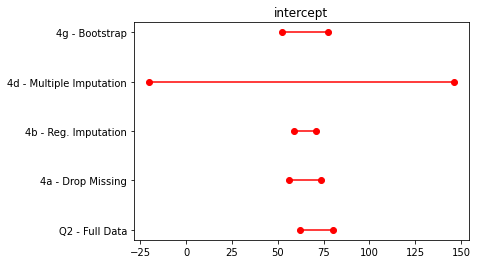

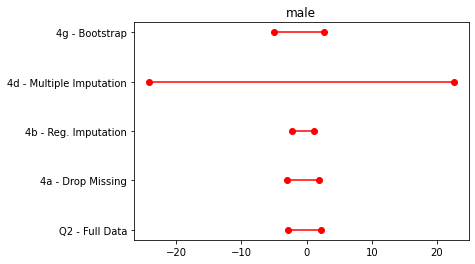

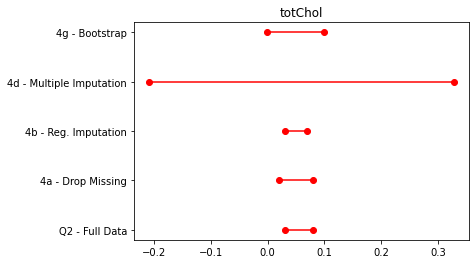

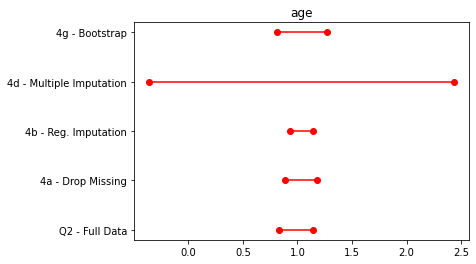

In [153]:
#Q4.h.2
# plot CI

coefficients = ['intercept', 'male','totChol', 'age']
questions = ['Q2 - Full Data','4a - Drop Missing','4b - Reg. Imputation', '4d - Multiple Imputation', '4g - Bootstrap']
for i in range(4):
  plt.plot((cis_q2[i][0],cis_q2[i][1]),(0,0),'ro-',color='red')
  plt.plot((cis_4a[i][0],cis_4a[i][1]),(1,1),'ro-',color='red')
  plt.plot((cis_4b[i][0],cis_4b[i][1]),(2,2),'ro-',color='red')
  plt.plot((cis_d[i][0],cis_d[i][1]),(3,3),'ro-',color='red')
  plt.plot((cis_g[i][0],cis_g[i][1]),(4,4),'ro-',color='red')
  plt.title(coefficients[i])
  plt.yticks(range(5),questions)
  plt.show()
  print()
  print()

ניתן לראות ש multiple imputation

נותן רווח סמך רחב מאוד ביחס לאחרים.

כל השיטות האחרות הן בסה״כ די קרובות ודומות.

In [156]:
%%shell
jupyter nbconvert --to html /content/Project_ex5b_316299098_316508126.ipynb

[NbConvertApp] Converting notebook /content/Project_ex5b_316299098_316508126.ipynb to html
[NbConvertApp] Writing 382822 bytes to /content/Project_ex5b_316299098_316508126.html
